<a href="https://colab.research.google.com/github/sevendaystoglory/temp/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

In [ ]:
!pip install "fair-esm[esmfold]"
# OpenFold and its remaining dependency
!pip install 'dllogger @ git+https://github.com/NVIDIA/dllogger.git'
!pip install 'openfold @ git+https://github.com/aqlaboratory/openfold.git@4b41059694619831a7db195b7e0988fc4ff3a307'

  Cloning https://github.com/NVIDIA/dllogger.git to /tmp/pip-install-t5n3sa_9/dllogger_f90bd07872784cb595f1b3d4e15178ca
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA/dllogger.git /tmp/pip-install-t5n3sa_9/dllogger_f90bd07872784cb595f1b3d4e15178ca
  Resolved https://github.com/NVIDIA/dllogger.git to commit 0540a43971f4a8a16693a9de9de73c1072020769
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/aqlaboratory/openfold.git (to revision 4b41059694619831a7db195b7e0988fc4ff3a307) to /tmp/pip-install-lu2ff_fp/openfold_2378689ab407424996b514499d41af80
  Running command git clone --filter=blob:none --quiet https://github.com/aqlaboratory/openfold.git /tmp/pip-install-lu2ff_fp/openfold_2378689ab407424996b514499d41af80
  Running command git rev-parse -q --verify 'sha^4b41059694619831a7db195b7e0988fc4ff3a307'
  Running command git fetch -q https://github.com/aqlaboratory/openfold.git 4b41059694619831a7db195b7e0988fc4ff3a307
  Running command g

In [ ]:
import torch
import esm

# Load ESM-2 model
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0-32): 33 x TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
  )
  (contact_head): ContactPredictionHead(
    (regression): Linear(in_features=660, out_features=1, bias=True)
    (activation): Sigmoid()
  )
  (emb_layer_norm_after): LayerNorm((1280,), eps=1

In [ ]:
next(model.parameters()).is_cuda
device = torch.device("cuda")
model.to(device)
next(model.parameters()).is_cuda

True

tensor([[ 0, 20, 15, 11,  7, 10, 16,  9, 10,  4, 15,  8, 12,  7, 10, 12,  4,  9,
         10,  8, 15,  9, 14,  7,  8,  6,  5, 16,  4,  5,  9,  9,  4,  8,  7,  8,
         10, 16,  7, 12,  7, 16, 13, 12,  5, 19,  4, 10,  8,  4,  6, 19, 17, 12,
          7,  5, 11, 14, 10,  6, 19,  7,  4,  5,  6,  6,  2,  1,  1,  1,  1,  1,
          1],
        [ 0, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 21,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9,
          2],
        [ 0, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 32,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9,


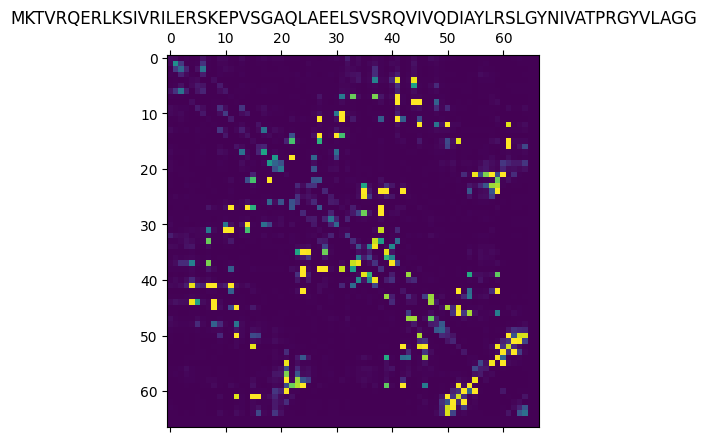

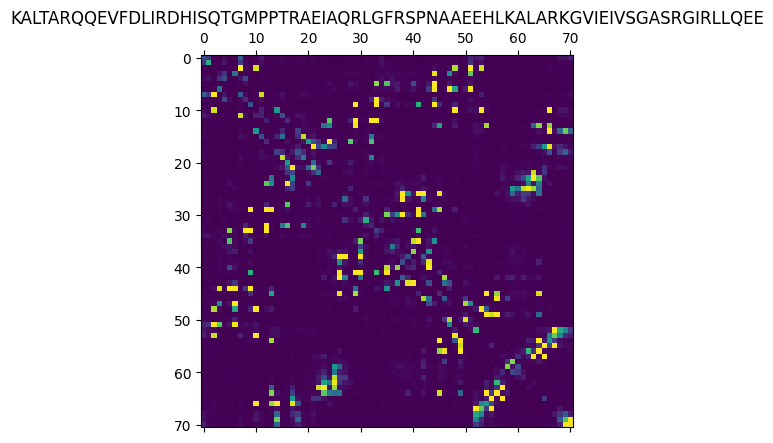

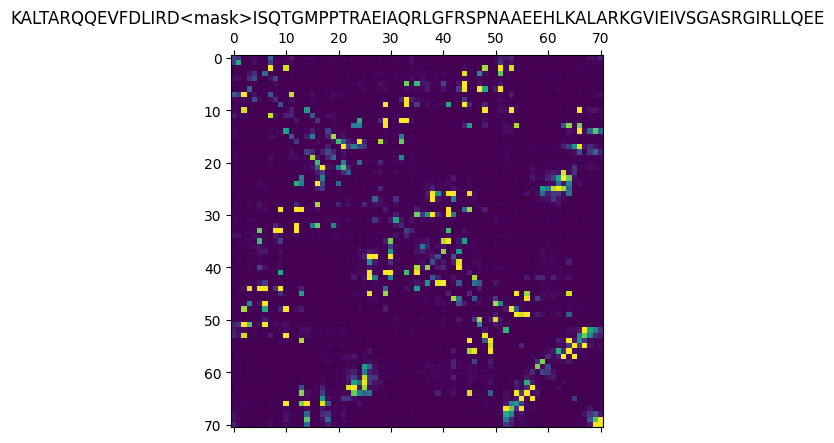

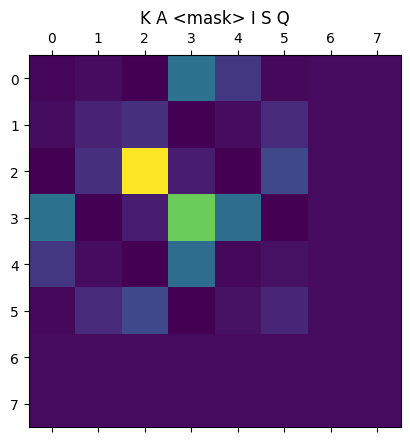

In [ ]:

# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein2 with mask","KALTARQQEVFDLIRD<mask>ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein3",  "K A <mask> I S Q"),
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)
print (batch_tokens)
batch_tokens = batch_tokens.to(device) #redeclare the tensor while pushing it to cuda
batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=True)
token_representations = results["representations"][33]
print(token_representations)
print(token_representations.shape)


# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, tokens_len in enumerate(batch_lens):
    print(tokens_len)
    sequence_representations.append(token_representations[i, 1 : tokens_len - 1].mean(0))

import matplotlib.pyplot as plt
for (_, seq), tokens_len, attention_contacts in zip(data, batch_lens, results["contacts"]):
    # Move the attention_contacts tensor to the CPU before converting to NumPy array
    attention_contacts_cpu = attention_contacts[: tokens_len, : tokens_len].cpu()
    plt.matshow(attention_contacts_cpu.numpy()) # Convert to NumPy array
    plt.title(seq)
    # plt.show()